In [133]:
import pandas as pd
import numpy as np
import kagglehub
import json

In [134]:
!pip install kagglehub
import kagglehub
path = kagglehub.dataset_download("rmisra/news-category-dataset")
print("Dataset downloaded to:", path)

import os

# List files inside the dataset folder
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


        df = pd.read_json(path + "/News_Category_Dataset_v3.json", lines=True)
df


Using Colab cache for faster access to the 'news-category-dataset' dataset.
Dataset downloaded to: /kaggle/input/news-category-dataset
/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [135]:
df["category"].nunique()

42

In [136]:
df.shape

(209527, 6)

In [137]:
catagories = df["category"].unique()
catagories

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [138]:
mask=df["category"].str.contains("^\s+|\s+$")
df[mask]

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-983403979.py:1: SyntaxWarning: invalid escape sequence '\s'
  mask=df["category"].str.contains("^\s+|\s+$")


,link,headline,category,short_description,authors,date


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [141]:
categories = df.groupby("category").size().index.tolist()
catagories_list = {}
int_catagories_list = {}
for i, k in enumerate(categories):
    catagories_list.update({k: i})
    int_catagories_list.update({i: k})

df['c2id'] = df['category'].apply(lambda x: catagories_list[x])
print(catagories_list)
print(int_catagories_list)

{'ARTS': 0, 'ARTS & CULTURE': 1, 'BLACK VOICES': 2, 'BUSINESS': 3, 'COLLEGE': 4, 'COMEDY': 5, 'CRIME': 6, 'CULTURE & ARTS': 7, 'DIVORCE': 8, 'EDUCATION': 9, 'ENTERTAINMENT': 10, 'ENVIRONMENT': 11, 'FIFTY': 12, 'FOOD & DRINK': 13, 'GOOD NEWS': 14, 'GREEN': 15, 'HEALTHY LIVING': 16, 'HOME & LIVING': 17, 'IMPACT': 18, 'LATINO VOICES': 19, 'MEDIA': 20, 'MONEY': 21, 'PARENTING': 22, 'PARENTS': 23, 'POLITICS': 24, 'QUEER VOICES': 25, 'RELIGION': 26, 'SCIENCE': 27, 'SPORTS': 28, 'STYLE': 29, 'STYLE & BEAUTY': 30, 'TASTE': 31, 'TECH': 32, 'THE WORLDPOST': 33, 'TRAVEL': 34, 'U.S. NEWS': 35, 'WEDDINGS': 36, 'WEIRD NEWS': 37, 'WELLNESS': 38, 'WOMEN': 39, 'WORLD NEWS': 40, 'WORLDPOST': 41}
{0: 'ARTS', 1: 'ARTS & CULTURE', 2: 'BLACK VOICES', 3: 'BUSINESS', 4: 'COLLEGE', 5: 'COMEDY', 6: 'CRIME', 7: 'CULTURE & ARTS', 8: 'DIVORCE', 9: 'EDUCATION', 10: 'ENTERTAINMENT', 11: 'ENVIRONMENT', 12: 'FIFTY', 13: 'FOOD & DRINK', 14: 'GOOD NEWS', 15: 'GREEN', 16: 'HEALTHY LIVING', 17: 'HOME & LIVING', 18: 'IMPAC

In [142]:
df["text"] = df.headline+" "+ df.short_description

words = df.text.str.split(expand=True).stack()
voch_size=len(words.unique())+1

maxlen=50


from tensorflow.keras.layers import TextVectorization



In [149]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Embedding

# Define embedding dimension
EMBEDDING_DIM = 100 # You can adjust this dimension as needed

# Make sure vectorize_layer and voch_size are defined from previous cells
if 'vectorize_layer' in locals() and 'voch_size' in locals():
    # Create a trainable Embedding layer
    embedding_layer = Embedding(input_dim=voch_size,
                                output_dim=EMBEDDING_DIM,
                                trainable=True) # Set trainable to True

    print("Trainable Embedding layer created successfully.")
else:
    print("Error: vectorize_layer or voch_size not defined. Cannot create Embedding layer.")

# Remove or comment out the GloVe loading and embedding_matrix creation code
# as we are using a trainable embedding layer instead.
# embeddings_index = {}
# glove_file_path = os.path.join(glove_path, 'glove.6B.100d.txt')
# try:
#     f = open(glove_file_path, encoding='utf8')
#     ...
# except FileNotFoundError:
#     ...
# except NameError:
#     ...
# except Exception:
#     ...

# embedding_matrix = np.zeros((voch_size, EMBEDDING_DIM))
# ...
# embeddings_initializer=Constant(embedding_matrix),
# trainable=False)

Trainable Embedding layer created successfully.


In [144]:
from sklearn.model_selection import train_test_split # Import train_test_split
from keras.utils import to_categorical # Import to_categorical
import numpy as np # Import numpy


seed = 29
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['category'] ,random_state=seed)

# Convert category IDs to one-hot encoded labels for both train and validation sets
# Ensure df.c2id was created in a previous cell
Y_train = to_categorical(list(train_df.c2id))
Y_val = to_categorical(list(val_df.c2id))

# Assign to y_train and y_val for consistency with previous code
y_train = Y_train
y_val = Y_val

# Convert y_train and y_val to numpy arrays (this was already here, keeping it)
y_train = np.array(y_train)
y_val = np.array(y_val)
# --- End of data splitting code ---


# Use the raw text columns for input to the new model
x_train_raw = train_df['text']
x_val_raw = val_df['text']

# Convert pandas Series to NumPy arrays of strings
x_train_raw_np = x_train_raw.to_numpy()
x_val_raw_np = x_val_raw.to_numpy()

In [145]:
from sklearn.model_selection import train_test_split # Import train_test_split
from keras.utils import to_categorical # Import to_categorical
import numpy as np # Import numpy


seed = 29
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['category'] ,random_state=seed)

# Convert category IDs to one-hot encoded labels for both train and validation sets
# Ensure df.c2id was created in a previous cell
Y_train = to_categorical(list(train_df.c2id))
Y_val = to_categorical(list(val_df.c2id))

# Assign to y_train and y_val for consistency with previous code
y_train = Y_train
y_val = Y_val

# Convert y_train and y_val to numpy arrays (this was already here, keeping it)
y_train = np.array(y_train)
y_val = np.array(y_val)
# --- End of data splitting code ---


# Use the raw text columns for input to the new model
x_train_raw = train_df['text']
x_val_raw = val_df['text']

# Convert pandas Series to NumPy arrays of strings
x_train_raw_np = x_train_raw.to_numpy()
x_val_raw_np = x_val_raw.to_numpy()
from keras.utils import to_categorical, pad_sequences

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Dropout, Flatten, Concatenate, Dense
# Remove Constant initializer if using trainable embedding
# from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split # Import train_test_split
from keras.utils import to_categorical # Import to_categorical
import numpy as np # Import numpy


# Assuming vectorize_layer and embedding_layer are already defined and adapted/initialized
# from previous steps (using the same vocab_size, maxlen, EMBEDDING_DIM, and embedding_matrix)

# Define the input layer to accept raw strings
raw_text_inputs = Input(shape=(1,), dtype=tf.string, name='text_input')

# Pass the raw text through the TextVectorization layer
vectorized_text = vectorize_layer(raw_text_inputs)


# Pass the vectorized text through the Embedding layer
# embedding_layer should be created in a previous cell (now trainable)
embedded_text = embedding_layer(vectorized_text)

# Build the rest of the CNN model on top of the embedding output
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedded_text)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)

# Output layer (same as before)
# Use len(int_category) for the number of output classes
outputs = Dense(len(int_catagories_list), activation='softmax', name='category_output')(drop)

# Create the new end-to-end model
EndToEndTextCNN = Model(inputs=raw_text_inputs, outputs=outputs)

# Compile the model
EndToEndTextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
EndToEndTextCNN.summary()

# --- Add the data splitting code here ---
# Split the dataframe into training and validation sets FIRST
seed = 29
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['category'] ,random_state=seed)

# Convert category IDs to one-hot encoded labels for both train and validation sets
# Ensure df.c2id was created in a previous cell
Y_train = to_categorical(list(train_df.c2id))
Y_val = to_categorical(list(val_df.c2id))

# Assign to y_train and y_val for consistency with previous code
y_train = Y_train
y_val = Y_val

# Convert y_train and y_val to numpy arrays (this was already here, keeping it)
y_train = np.array(y_train)
y_val = np.array(y_val)
# --- End of data splitting code ---


# Use the raw text columns for input to the new model
x_train_raw = train_df['text']
x_val_raw = val_df['text']

# Convert pandas Series to NumPy arrays of strings
x_train_raw_np = x_train_raw.to_numpy()
x_val_raw_np = x_val_raw.to_numpy()


# Use the one-hot encoded labels (y_train and y_val) from previous steps

print("\nTraining the new End-to-End Model...")
# Train the model using the NumPy arrays of raw text
end_to_end_history = EndToEndTextCNN.fit(x_train_raw_np, # Use NumPy array
                                         y_train, # Use the one-hot encoded labels
                                         batch_size=256,
                                         epochs=5, # Use the same number of epochs as before
                                         validation_data=(x_val_raw_np, y_val)) # Use NumPy array

# Save the new end-to-end model
EndToEndTextCNN.save('end_to_end_textcnn_model.keras')

print("\nEnd-to-End Model saved successfully to 'end_to_end_textcnn_model.keras'")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, 50)        │          0 │ text_input[0][0]  │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 100)   │ 30,063,600 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 50, 64)    │     12,864 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 50, 64)    │     19,264 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 50, 64)    │     25,664 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 16, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 16, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 16, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 64)    │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16, 64)    │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16, 64)    │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 192)   │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0],  │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3072)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 3072)      │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_output     │ (None, 42)        │    129,066 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 30,250,458 (115.40 MB)

 Trainable params: 30,250,458 (115.40 MB)

 Non-trainable params: 0 (0.00 B)


Training the new End-to-End Model...
Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 374s 567ms/step - accuracy: 0.2753 - loss: 2.8519 - val_accuracy: 0.5470 - val_loss: 1.7219
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 396s 588ms/step - accuracy: 0.5751 - loss: 1.5848 - val_accuracy: 0.6016 - val_loss: 1.4745
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 438s 583ms/step - accuracy: 0.6642 - loss: 1.2019 - val_accuracy: 0.6134 - val_loss: 1.4367
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 381s 582ms/step - accuracy: 0.7230 - loss: 0.9690 - val_accuracy: 0.6124 - val_loss: 1.4724
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 385s 588ms/step - accuracy: 0.7672 - loss: 0.8008 - val_accuracy: 0.6090 - val_loss: 1.5516

End-to-End Model saved successfully to 'end_to_end_textcnn_model.keras'


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Dropout, Flatten, Concatenate, Dense
# Remove Constant initializer if using trainable embedding
# from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split # Import train_test_split
from keras.utils import to_categorical # Import to_categorical
import numpy as np # Import numpy


# Assuming vectorize_layer and embedding_layer are already defined and adapted/initialized
# from previous steps (using the same vocab_size, maxlen, EMBEDDING_DIM, and embedding_matrix)

# Define the input layer to accept raw strings
raw_text_inputs = Input(shape=(1,), dtype=tf.string, name='text_input')

# Pass the raw text through the TextVectorization layer
vectorized_text = vectorize_layer(raw_text_inputs)


# Pass the vectorized text through the Embedding layer
# embedding_layer should be created in a previous cell (now trainable)
embedded_text = embedding_layer(vectorized_text)

# Build the rest of the CNN model on top of the embedding output
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedded_text)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)

# Output layer (same as before)
# Use len(int_category) for the number of output classes
outputs = Dense(len(int_catagories_list), activation='softmax', name='category_output')(drop)

# Create the new end-to-end model
EndToEndTextCNN = Model(inputs=raw_text_inputs, outputs=outputs)

# Compile the model
EndToEndTextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
EndToEndTextCNN.summary()

# --- Add the data splitting code here ---
# Split the dataframe into training and validation sets FIRST
seed = 29
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['category'] ,random_state=seed)

# Convert category IDs to one-hot encoded labels for both train and validation sets
# Ensure df.c2id was created in a previous cell
Y_train = to_categorical(list(train_df.c2id))
Y_val = to_categorical(list(val_df.c2id))

# Assign to y_train and y_val for consistency with previous code
y_train = Y_train
y_val = Y_val

# Convert y_train and y_val to numpy arrays (this was already here, keeping it)
y_train = np.array(y_train)
y_val = np.array(y_val)
# --- End of data splitting code ---


# Use the raw text columns for input to the new model
x_train_raw = train_df['text']
x_val_raw = val_df['text']

# Convert pandas Series to NumPy arrays of strings
x_train_raw_np = x_train_raw.to_numpy()
x_val_raw_np = x_val_raw.to_numpy()


# Use the one-hot encoded labels (y_train and y_val) from previous steps

print("\nTraining the new End-to-End Model...")
# Train the model using the NumPy arrays of raw text
end_to_end_history = EndToEndTextCNN.fit(x_train_raw_np, # Use NumPy array
                                         y_train, # Use the one-hot encoded labels
                                         batch_size=256,
                                         epochs=5, # Use the same number of epochs as before
                                         validation_data=(x_val_raw_np, y_val)) # Use NumPy array

# Save the new end-to-end model
EndToEndTextCNN.save('end_to_end_textcnn_model.keras')

print("\nEnd-to-End Model saved successfully to 'end_to_end_textcnn_model.keras'")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, 50)        │          0 │ text_input[0][0]  │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 100)   │ 30,063,600 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 50, 64)    │     12,864 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 50, 64)    │     19,264 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 50, 64)    │     25,664 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 16, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 16, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 16, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 64)    │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16, 64)    │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16, 64)    │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 192)   │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0],  │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3072)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 3072)      │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_output     │ (None, 42)        │    129,066 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 30,250,458 (115.40 MB)

 Trainable params: 30,250,458 (115.40 MB)

 Non-trainable params: 0 (0.00 B)


Training the new End-to-End Model...
Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 374s 567ms/step - accuracy: 0.2753 - loss: 2.8519 - val_accuracy: 0.5470 - val_loss: 1.7219
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 396s 588ms/step - accuracy: 0.5751 - loss: 1.5848 - val_accuracy: 0.6016 - val_loss: 1.4745
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 438s 583ms/step - accuracy: 0.6642 - loss: 1.2019 - val_accuracy: 0.6134 - val_loss: 1.4367
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 381s 582ms/step - accuracy: 0.7230 - loss: 0.9690 - val_accuracy: 0.6124 - val_loss: 1.4724
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 385s 588ms/step - accuracy: 0.7672 - loss: 0.8008 - val_accuracy: 0.6090 - val_loss: 1.5516

End-to-End Model saved successfully to 'end_to_end_textcnn_model.keras'


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Dropout, Flatten, Concatenate, Dense
# Remove Constant initializer if using trainable embedding
# from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split # Import train_test_split
from keras.utils import to_categorical # Import to_categorical
import numpy as np # Import numpy


# Assuming vectorize_layer and embedding_layer are already defined and adapted/initialized
# from previous steps (using the same vocab_size, maxlen, EMBEDDING_DIM, and embedding_matrix)

# Define the input layer to accept raw strings
raw_text_inputs = Input(shape=(1,), dtype=tf.string, name='text_input')

# Pass the raw text through the TextVectorization layer
vectorized_text = vectorize_layer(raw_text_inputs)


# Pass the vectorized text through the Embedding layer
# embedding_layer should be created in a previous cell (now trainable)
embedded_text = embedding_layer(vectorized_text)

# Build the rest of the CNN model on top of the embedding output
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedded_text)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)

# Output layer (same as before)
# Use len(int_category) for the number of output classes
outputs = Dense(len(int_catagories_list), activation='softmax', name='category_output')(drop)

# Create the new end-to-end model
EndToEndTextCNN = Model(inputs=raw_text_inputs, outputs=outputs)

# Compile the model
EndToEndTextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
EndToEndTextCNN.summary()

# --- Add the data splitting code here ---
# Split the dataframe into training and validation sets FIRST
seed = 29
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['category'] ,random_state=seed)

# Convert category IDs to one-hot encoded labels for both train and validation sets
# Ensure df.c2id was created in a previous cell
Y_train = to_categorical(list(train_df.c2id))
Y_val = to_categorical(list(val_df.c2id))

# Assign to y_train and y_val for consistency with previous code
y_train = Y_train
y_val = Y_val

# Convert y_train and y_val to numpy arrays (this was already here, keeping it)
y_train = np.array(y_train)
y_val = np.array(y_val)
# --- End of data splitting code ---


# Use the raw text columns for input to the new model
x_train_raw = train_df['text']
x_val_raw = val_df['text']

# Convert pandas Series to NumPy arrays of strings
x_train_raw_np = x_train_raw.to_numpy()
x_val_raw_np = x_val_raw.to_numpy()


# Use the one-hot encoded labels (y_train and y_val) from previous steps

print("\nTraining the new End-to-End Model...")
# Train the model using the NumPy arrays of raw text
end_to_end_history = EndToEndTextCNN.fit(x_train_raw_np, # Use NumPy array
                                         y_train, # Use the one-hot encoded labels
                                         batch_size=256,
                                         epochs=5, # Use the same number of epochs as before
                                         validation_data=(x_val_raw_np, y_val)) # Use NumPy array

# Save the new end-to-end model
EndToEndTextCNN.save('end_to_end_textcnn_model.keras')

print("\nEnd-to-End Model saved successfully to 'end_to_end_textcnn_model.keras'")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, 50)        │          0 │ text_input[0][0]  │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 100)   │ 30,063,600 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 50, 64)    │     12,864 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 50, 64)    │     19,264 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 50, 64)    │     25,664 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 16, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 16, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 16, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 64)    │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16, 64)    │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16, 64)    │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 192)   │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0],  │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3072)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 3072)      │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_output     │ (None, 42)        │    129,066 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 30,250,458 (115.40 MB)

 Trainable params: 30,250,458 (115.40 MB)

 Non-trainable params: 0 (0.00 B)


Training the new End-to-End Model...
Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 374s 567ms/step - accuracy: 0.2753 - loss: 2.8519 - val_accuracy: 0.5470 - val_loss: 1.7219
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 396s 588ms/step - accuracy: 0.5751 - loss: 1.5848 - val_accuracy: 0.6016 - val_loss: 1.4745
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 438s 583ms/step - accuracy: 0.6642 - loss: 1.2019 - val_accuracy: 0.6134 - val_loss: 1.4367
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 381s 582ms/step - accuracy: 0.7230 - loss: 0.9690 - val_accuracy: 0.6124 - val_loss: 1.4724
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 385s 588ms/step - accuracy: 0.7672 - loss: 0.8008 - val_accuracy: 0.6090 - val_loss: 1.5516

End-to-End Model saved successfully to 'end_to_end_textcnn_model.keras'


1310/1310 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step


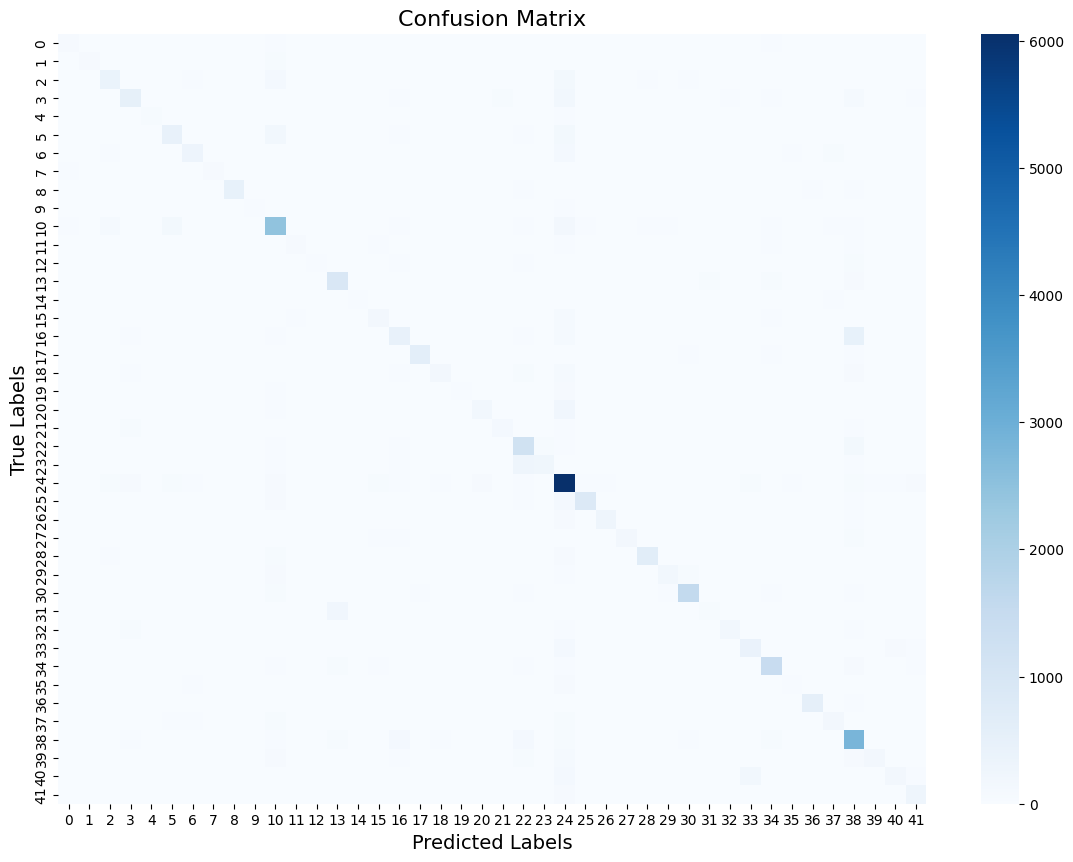


Classification Report:

                precision    recall  f1-score   support

          ARTS       0.33      0.30      0.31       302
ARTS & CULTURE       0.37      0.27      0.31       268
  BLACK VOICES       0.47      0.41      0.44       917
      BUSINESS       0.50      0.44      0.47      1198
       COLLEGE       0.46      0.28      0.35       229
        COMEDY       0.50      0.42      0.46      1080
         CRIME       0.56      0.45      0.50       712
CULTURE & ARTS       0.57      0.34      0.42       215
       DIVORCE       0.79      0.71      0.75       685
     EDUCATION       0.48      0.23      0.31       203
 ENTERTAINMENT       0.64      0.71      0.67      3473
   ENVIRONMENT       0.41      0.30      0.34       289
         FIFTY       0.27      0.13      0.18       280
  FOOD & DRINK       0.64      0.74      0.69      1268
     GOOD NEWS       0.36      0.16      0.22       280
         GREEN       0.35      0.35      0.35       524
HEALTHY LIVING       0

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Get predictions on validation set
y_val_pred_probs = EndToEndTextCNN.predict(x_val_raw_np)  # predicted probabilities
y_val_pred = np.argmax(y_val_pred_probs, axis=1)          # predicted class indices

# 2. Convert true labels back from one-hot
y_val_true = np.argmax(y_val, axis=1)

# 3. Compute confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred)

# 4. Plot confusion matrix
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

# 5. Print classification report (precision, recall, f1-score)
print("\nClassification Report:\n")

# Get target names by sorting the integer keys of int_catagories_list and getting the string values
sorted_keys = sorted(int_catagories_list.keys())
target_names_list = [int_catagories_list[key] for key in sorted_keys]

print(classification_report(y_val_true, y_val_pred, target_names=target_names_list))

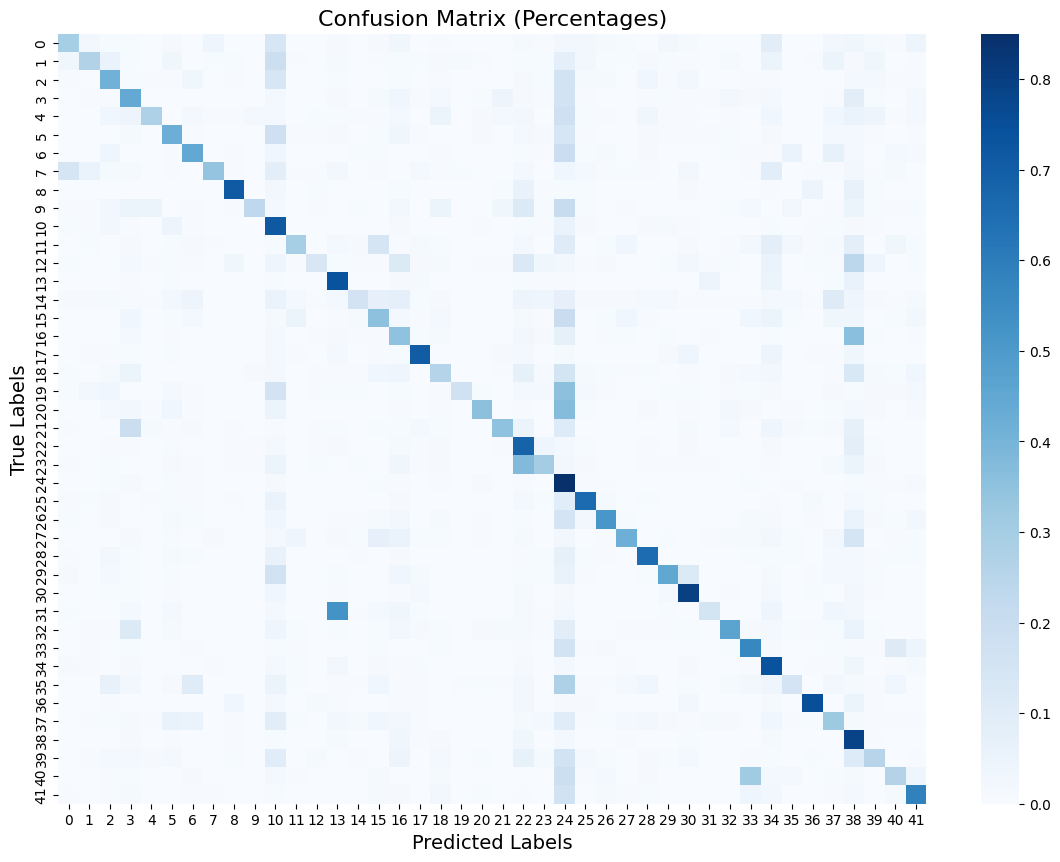

In [155]:
# Convert confusion matrix to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix in percentages
plt.figure(figsize=(14, 10))
sns.heatmap(cm_percent, annot=False, cmap="Blues", fmt=".2%") # Use .2% for percentage formatting
plt.title("Confusion Matrix (Percentages)", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

In [156]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('end_to_end_textcnn_model.keras')

print("Model loaded successfully!")

# You can now use the loaded_model to make predictions on new text data.
# For example:
# new_text = ["This is a test news headline and short description.", "Another example of news text."]
# predictions = loaded_model.predict(new_text)

# To see the predicted categories, you would typically use the int_catagories_list
# to map the predicted class indices back to category names.
# predicted_class_indices = np.argmax(predictions, axis=1)
# predicted_categories = [int_catagories_list[i] for i in predicted_class_indices]
# print("Predicted categories:", predicted_categories)

Model loaded successfully!


In [158]:
import tensorflow as tf
import numpy as np

# Load the saved model
loaded_model = tf.keras.models.load_model('end_to_end_textcnn_model.keras')

print("Model loaded successfully!")

# Example of new text data to predict on
new_text = [
    "This is a test news headline and short description about politics.",
    "Another example of news text focusing on sports.",
    "A headline and description about entertainment news."
]

# Convert the list of strings to a NumPy array of strings
new_text_np = np.array(new_text, dtype=object)

# Make predictions on the new text data using the NumPy array
predictions = loaded_model.predict(new_text_np)

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Use the int_catagories_list to map the predicted indices back to category names
# Ensure int_catagories_list is defined in a previous cell
if 'int_catagories_list' in locals():
    predicted_categories = [int_catagories_list[i] for i in predicted_class_indices]
    print("\nPredicted categories for the new text:")
    for text, category in zip(new_text, predicted_categories):
        print(f"- Text: '{text}'\n  Predicted Category: {category}\n")
else:
    print("\n'int_catagories_list' is not defined. Cannot map predicted indices to category names.")
    print("Predicted class indices:", predicted_class_indices)

Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step

Predicted categories for the new text:
- Text: 'This is a test news headline and short description about politics.'
  Predicted Category: POLITICS

- Text: 'Another example of news text focusing on sports.'
  Predicted Category: SPORTS

- Text: 'A headline and description about entertainment news.'
  Predicted Category: ENTERTAINMENT

